<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Wir arbeiten nun mit dem exportierten Datensatz '2_Data_for_Modeltraining.csv' aus 'Classification'. Den Datensatz legen wir auf Google Drive als Notebook ab, rufen ihn mit drive aus dem google.colab package auf und speichern ihn unter dem Variablen maindf für die weitere Verabreitung ab.

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
maindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2_Data_for_Modeltraining.csv")
#maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & ML/Projekt/2_Data_for_Modeltraining.csv')

Mounted at /content/drive




> Durch Ausgabe des Dataframes maindf können wir unseren aktuellen, über Google Drive in colab geladenen Datensatz einsehen.


In [2]:
maindf

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,...,country_CN,country_DEU,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA
0,0,342,2015,7,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,737,2015,7,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,7,2015,7,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,13,2015,7,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,14,2015,7,1,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90909,0,21,2017,8,30,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90910,0,23,2017,8,30,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90911,0,34,2017,8,31,7,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
90912,0,109,2017,8,31,7,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# **Vorbereitung des Datensatzes auf die Regression**



> Wir möchten durch eine Regression die 'average daily rate', also wie teuer ein Zimmer pro Nacht im Schnitt ist, vorhersagen. Dafür müssen wir zuerst aus den Daten die Spalte 'adr' entfernen bzw. diese seperat als y-Variable speichern, da es sich dabei um unsere target-Variable handelt. Durch den Train-Test-Split können wir später das Modell anhand der Trainingsdaten passend auf unsere X- und y-Daten trainieren und über den Abgleich der auf den X-test-Daten vorhergesagten y-Werten zu den tatsächlichen y-test-Daten die Präzision des Modells bestimmen.



> Mit dem Befehl `drop(columns='adr')` entfernen wir die adr-Spalte aus den X-Daten. Wir speichern sie dafür mit `y = maindf.adr`.





In [3]:
X = maindf.drop(columns='adr')
y = maindf.adr



> Anschließend können wir die Daten mit der Funktion `train_test_split()`, die wir erst importieren müssen, in Trainings- und Testdaten aufteilen. Wir wählen hierfür eine Testgröße von 20% und den Random-State 42.



In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> Mit diesem Split trainieren wir verschiedene Modelle und prüfen über die Accuracy und den f1-Score, welches Modell für unsere Daten die beste Performance bietet. Wir testen

*   Lineare Regression
*   Support Vector Mechine (LinearSVR)
*   Decision Tree
*   Gradient Boosting
*   XGBoost
*   Neuronale Netze




> Außerdem benötigen wir einige Module bzw. Funktionen für alle Modelle, die wir einmal gebündelt zu Beginn importieren:



In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt


> Um unsere Ergebnisse vergleichen zu können, definieren wir nun noch eine `evaluate`-Function, die das Bestimmtheitsmaß (R2), den mittleren absoluten Fehler (MAE), den mittleren quadrierten Fehler (MSE), die Quadratwurzel des mittleren quadratischen Fehlers (RMSE) und den Mittlerer absoluter prozentualer Fehler (MAPE):




In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))



> Für die Bewertung der Modelle betrachten wir insbesondere das Bestimmtheitsmaß und den mittleren absoluten Fehler.



## **Lineare Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [ ]:
linear_scaled = make_pipeline(StandardScaler(),
                              linear)

In [ ]:
linear_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
evaluate(linear_scaled, X_test, y_test)

R2: 0.42282568506105156
MAE: 27.16709864849837
MSE: 1397.8925400717944
RMSE: 37.38840114356048
MAPE: 5558511303644892.0


In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(StandardScaler(),
                             RidgeCV(alphas=alphaValues))

In [ ]:
linear_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-10, 1.10975250e-10, 1.23155060e-10, 1.36671636e-10,
       1.51671689e-10, 1.68318035e-10, 1.86791360e-10, 2.07292178e-10,
       2.30043012e-10, 2.55290807e-10, 2.83309610e-10, 3.14403547e-10,
       3.48910121e-10, 3.87203878e-10, 4.29700470e-10, 4.76861170e-10,
       5.29197874e-10, 5.87278661...
       9.11588830e-03, 1.01163798e-02, 1.12266777e-02, 1.24588336e-02,
       1.38262217e-02, 1.53436841e-02, 1.70276917e-02, 1.88965234e-02,
       2.09704640e-02, 2.32720248e-02, 2.58261876e-02, 2.86606762e-02,
       3.18062569e-02, 3.52970730e-02, 3.91710149e-02, 4.34701316e-02,
       4.82410870e-02, 5.35356668e-02, 5.94113398e-02, 6.59318827e-02,
       7.31680714e-02, 8.11984499e-02, 9.01101825e-02, 1.00000000e-01])))])

In [ ]:
linear_ridge[1].alpha_

0.1

In [ ]:
evaluate(linear_ridge, X_test,y_test)

NameError: ignored

In [ ]:
maindf.adr.mean()

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dummy = DummyRegressor()

In [ ]:
dummy.fit(X_train, y_train)

In [ ]:
evaluate(dummy, X_test, y_test)

## **SVM**



> Als nächstes trainieren und evaluieren wir mithilfe des Support Vector Machine Regressors. Da wir große Datenmengen in das Modell geben, reicht die Standard-Implementierung nicht aus, wir benötigen `LinearSVR` von `sklearn`.




In [ ]:
from sklearn.svm import LinearSVR



> Wir bilden eine Pipeline, in der zuerst die Daten skaliert und dann direkt in das LinearSVR-Modell gegeben werden. Für das Modell verwenden wir wieder den random_state 42 und tol=1e-5. tol bezeichnet dabei den Toleranzwert, unter den der LinearSVR trainiert werden soll. Das Training wird beendet, wenn die Vorhersagen weniger oder gleich dem Toleranzwert von den tatsächlichen Zielwerten abweichen.
Ein niedriger Toleranzwert führt zwar zu einer hohen Genauigkeit, verlangsamt dafür aber das Training.

In [ ]:
lsvr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=42, tol=1e-5))



> Das Modell kann dann auf die Trainingsdaten trainiert werden.



In [ ]:
lsvr.fit(X_train, y_train)


> Nach Beenden des Trainings evaluieren wir den LinearSVR anhand der Testdaten.




In [ ]:
evaluate(lsvr, X_test, y_test)



> Mit einem Bestimmtheitsmaß von rund 39% ist das Modell nicht sehr stark. Wir versuchen deshalb noch weitere Modelle.



## **Regression Entscheidungsbaum**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(random_state=42)

In [ ]:
X = maindf_c.drop(columns='adr')
y = maindf_c.adr

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle = True)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def evaluate(reg, X_test, y_test):

  pred = reg.predict(X_test)

  print('R2:', r2_score(y_test, pred))

  print('MAE:', mean_absolute_error(y_test, pred))

  print('MSE:', mean_squared_error(y_test, pred))

  print('RMSE:', mean_squared_error(y_test, pred, squared=False))

  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

In [ ]:
evaluate(tree, X_test, y_test)

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X.columns);

In [ ]:
predictions = tree.predict(X_test)
maindf_with_predictions = pd.concat([X_test, y_test], axis='columns')
maindf_with_predictions = pd.concat([maindf_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=maindf_with_predictions.index)], axis=1)

In [ ]:
maindf_with_predictions = maindf_with_predictions.sort_values(by='stay_nights_sum')

In [ ]:
ax = maindf_with_predictions.plot(x='stay_nights_sum', y='adr', kind='scatter', s=20, edgecolor='black',
            c='darkorange', label='data', figsize=(20,5), ylim=([0, 600]))

maindf_with_predictions.plot(x='stay_nights_sum', y='adr', kind='line', color='cornflowerblue',
         label='prediction', linewidth=2, ax=ax)

ax.set_xlabel('stay_nights_sum')
ax.set_ylabel('adr')
ax.set_title('Decision Tree Regression')
ax.legend()

### **Hyperparametertuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Definiere den Entscheidungsbaumregressor
tree = DecisionTreeRegressor()

In [ ]:
# Definiere das Gitter der Hyperparameter
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Führe die Grid-Suche durch
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
# Finde die besten Hyperparameter
best_params = grid_search.best_params_
print("Beste Hyperparameter:", best_params)

In [ ]:
# Trainiere den Entscheidungsbaumregressor mit den besten Hyperparametern
best_tree = DecisionTreeRegressor(**best_params)
best_tree.fit(X_train, y_train)

In [ ]:
# Evaluieren auf den Testdaten
y_pred = best_tree.predict(X_test)

In [ ]:
evaluate(best_tree, X_test, y_test)

## **Gradient Boosting**



> Nach Training und Evaluation des Decision Trees versuchen wir wieder die Ensemble-Implementierung Gradient Boosting, die aus vielen schwächeren Decision Trees ein stärkeres Modell entwickelt. Dafür benötigen wir den `GradientBoostingRegressor` von `sklearn`.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor



> Wir erstellen die Pipeline aus Scaler und Regressor. Danach trainieren wir das Modell.



In [ ]:
gb = make_pipeline(StandardScaler(),
                   GradientBoostingRegressor(random_state=42))

In [ ]:
gb.fit(X_train, y_train)



> Die Evaluation zeigt, dass GradientBoosting mit einem Bestimmtheitsmaß von 0,64 deutlich besser performt, als die vorherigen Modelle. Der mittlere absolute Fehler liegt bei 20,86, was bedeutet, dass im Schnitt das Modell die adr um rund 21€ falsch vorhersagt. Wir versuchen, durch Hyperparameter Tuning die Ergebnisse
 noch zu verbessern.



In [ ]:
evaluate(gb, X_test, y_test)

### **Hyperparameter Tuning**



> Für das Hyperparameter Tuning erstellen wir ein Grid, das die notwendigen Hyperparameter definiert, die im Tuning getestet werden sollen, um daraus die Hyperparameter zu ermitteln, die die besten Ergebnisse erzielen.



In [ ]:
param_grid = {
    'gradientboostingregressor__loss': ['ls', 'lad', 'huber', 'quantile'],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'gradientboostingregressor__n_estimators': [100, 500, 1000],
    'gradientboostingregressor__max_depth': [3, 5, 7, 9],
    'gradientboostingregressor__min_samples_split': [2, 4, 6],
    'gradientboostingregressor__min_samples_leaf': [1, 2, 3],
    'gradientboostingregressor__random_state': [42],
    'standardscaler': [StandardScaler(), None],
}



> Wir nutzen nun wieder die RandomizedSearch in Kombination mit cross-validation. Wir übergeben das Modell, das Grid, die Anzahl an Iterationen, die Angabe `n_jobs=-1`, um alle verfügbaren Prozessoren für diese Aufgabe zu nutzen und so eine möglichst niedrige Berechnungszeit zu erreichen, den random_state 42, die Bestimmung der cross-validation auf 5 Folds sowie die Ausgaben (verbose=1) während des Suchprozesses.

In [ ]:
# setting n_jobs=-1 will ensure that sklearn uses all available cpu cores
# takes a loooong time (reduce n_iter to make it faster)
optimized_gb = RandomizedSearchCV(gb, param_grid, n_iter=10, n_jobs=-1, random_state=42, cv=5, verbose=1)
optimized_gb.fit(X_train, y_train)



> Nach dem Tuning geben wir nun die bestmögliche Kombination an Hyperparametern aus, die wir durch Hyperparameter Tuning finden konnten und Evaluieren das optimierte Modell.



In [ ]:
optimized_gb.best_params_

In [ ]:
evaluate(optimized_gb, X_test, y_test)

> Das Modell hat sich deutlich verbessert, das Bestimmtheitsmaß liegt nun bei 0,787 und der MAE bei 14,10. Geht das mit einem anderen Modell noch besser?

## **XGB Regression**



> Als nächstes testen wir noch die XGB Regression, da diese bei der Classification ein vielversprechendes Modell war. Dafür importieren wir den `XGBRegressor` von `xgboost`, bilden die Pipeline und trainieren das Modell auf die Trainingsdaten. Im Anschluss evaluieren wird wieder anhand der Testdaten.


In [7]:
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_tree

xgb = make_pipeline(StandardScaler(),
                    XGBRegressor())
xgb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [8]:
evaluate(xgb, X_test, y_test)

R2: 0.7509161676659613
MAE: 15.697374519474966
MSE: 603.2708352745688
RMSE: 24.56157232903807
MAPE: 3262864847176914.5




> Wir können nun unsere y-Werte vorhersagen.



In [9]:
y_pred = xgb.predict(X_test)

### **Hyperparameter Tuning**



> Um das Modell, das bisher am besten performt nochmals zu verbessern, führen wir auch hier Hyperparameter Tuning durch. Dafür definieren wir wieder das Grid mit den notwendigen Parametern und übergeben es mit dem Modell, cross-validation, Iterations-Anzahl etc. in die RandomizedSearchCV.



In [10]:
regressor=XGBRegressor()

grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=grid,
            cv=5, n_iter=10,
            scoring = 'neg_mean_absolute_error', n_jobs = -1,
            verbose = 1,
            return_train_score = True,
            random_state=42)



> Wir trainieren das Hyperparameter-Tuning-Modell auf die Trainingsdaten und geben uns die besten estimators aus.



In [11]:
optimized_xgb = random_cv.fit(X_train,y_train)
optimized_xgb_est = random_cv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits




> Auch die Kombination der besten Parameter ist für uns interessant und wir lassen sie auflisten:



In [12]:
optimized_xgb.best_params_

{'n_estimators': 500,
 'max_depth': 15,
 'learning_rate': 0.05,
 'booster': 'gbtree',
 'base_score': 1}


> Das Ergebnis mit einem Bestimmtheitsmaß von 79,62% und einem MAE von 2,44€ ist ziemlich gut.
Wir sehen an dem großen Unterschied zwischen der Accuracy mit den Trainingsdaten zu der auf den Testdaten, dass das Modell zwar sehr gut auf den Trainingsdaten läuft, das Modell allerding so stark an die Trainingsdaten angepasst ist, dass es die Testdaten nicht mehr so genau abbilden kann (Overfitting).



In [13]:
print('Accuracy on trainingsdata is:')
evaluate(optimized_xgb, X_train, y_train)

print('Accuracy on testdata is:')
evaluate(optimized_xgb, X_test, y_test)

Accuracy on trainingsdata is:
R2: 0.991591134545762
MAE: 2.4459816879123095
MSE: 22.564013270639407
RMSE: 4.750159288975413
MAPE: 409555951761965.9
Accuracy on testdata is:
R2: 0.7962447174361471
MAE: 12.366158402925478
MSE: 493.4869451464741
RMSE: 22.21456605802765
MAPE: 2770714546503008.0




> Auch mit dem verbesserten Modell können wir unsere y-Werte vorhersagen.



In [14]:
best_xgb = optimized_xgb.best_estimator_
y_best_predict = best_xgb.predict(X_test)

### **Plotting**



> Mithilfe der optimierten XGBoost-Modells (das aus dem besten durch das Hyperparameter Tuning ermittelten Schätzer besteht) können wir nun Vorhersagen für die y-Werte auf Basis der X-Test-Daten treffen.

> Für die weitere Berechnung müssen wir außerdem die Anzahl an verwendeten Schätzern (`n_estimators`) für das optimierte Modell ermitteln.

> Diese Schätzer werden mit dem Befehl `np.zeros` in einem Array, gefüllt mit den n_estimators und Nullen, gespeichert.

> Mithilfe einer `for-Loop` wird für jede Vorhersage der Devianzfehler (=Residuenfehler) zwischen den Vorhersagen (`predictions`) und den wahren Werten (`y_test`) berechnet. Diese Fehler werden im entsprechenden Index in test_score gespeichert.



Es scheint jedoch ein Fehler zu geben, da mse in der Schleife berechnet wird, aber nicht verwendet wird.
.

Der Code versucht dann, Vorhersagen für den Trainingsdatensatz (X_train) zu generieren und den mittleren quadratischen Fehler (train_mse) zwischen den Vorhersagen und den wahren Werten (y_train) zu berechnen.




> Die Devianz der Trainingsdaten können wir nun in einem Diagramm der Devianz der Testdaten in Abhängigkeit von den Boosting-Iterationen gegenüberstellen. So können wir den Fortschritt von Boosting-Prozessen und mögliches Overfitting bewerten.



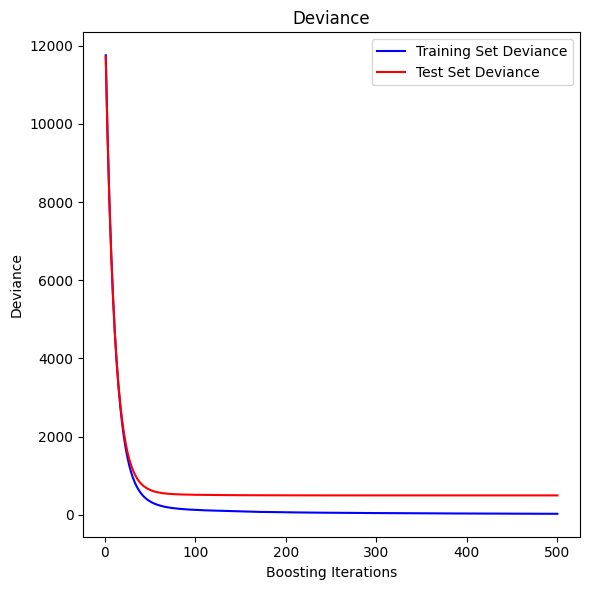

In [29]:
# get best xgb model (after hyperparam tuning)
best_xgb = optimized_xgb.best_estimator_

# how many estimators were used for the model
n_estimators = optimized_xgb.best_params_['n_estimators']

# calculate deviance (error) for all examples in test set
test_score = np.zeros((n_estimators,), dtype=np.float64)
train_score = np.zeros((n_estimators,), dtype=np.float64)
for i in range(n_estimators):
    y_train_pred = best_xgb.predict(X_train, iteration_range=(0, i+1))
    y_pred = best_xgb.predict(X_test, iteration_range=(0, i+1))
    test_score[i] = mean_squared_error(y_test, y_pred)
    train_score[i] = mean_squared_error(y_train, y_train_pred)

# Plotting the deviance
plt.figure(figsize=(6, 6))
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, train_score, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.tight_layout()
plt.show()

### **Error Analysis**



> Durch eine grundlegende Fehleranalyse wollen wir außerdem ermitteln, wo das Modell besonders schlecht performt, wo es also noch fehlerhaft ist.
Dafür fügen wir die X- und y-Testdaten, sowie die Preditions (als neue Spalte 'Predicitions') dem Dataframe an.



In [16]:
predictions = optimized_xgb.predict(X_test)
maindf_with_predictions = pd.concat([X_test, y_test], axis='columns')
maindf_with_predictions = pd.concat([maindf_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=maindf_with_predictions.index)], axis=1)

In [17]:
maindf_with_predictions

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,...,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA,adr,Prediction
51109,1,56,2017,2,1,3,2,0,0,0,...,0,0,0,0,0,1,0,0,60.00,59.899277
78776,0,195,2016,10,28,4,2,0,0,0,...,0,1,0,0,0,0,0,0,96.30,101.924644
42532,1,177,2016,6,3,2,2,0,0,0,...,0,0,0,0,0,1,0,0,100.00,99.981667
6404,1,118,2016,7,25,7,2,0,0,0,...,1,0,0,0,0,0,0,0,162.86,176.072449
51888,1,28,2017,3,2,3,2,0,0,0,...,0,0,0,0,0,1,0,0,95.00,95.011871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,1,26,2015,10,4,5,2,0,0,0,...,0,0,0,0,0,1,0,0,79.85,92.765816
75548,0,3,2016,8,28,1,1,0,0,0,...,0,0,1,0,0,0,0,0,80.00,118.925827
36192,1,89,2015,10,3,4,2,0,0,0,...,0,0,0,0,0,1,0,0,62.00,62.244411
19223,0,31,2016,4,18,2,2,0,0,0,...,0,1,0,0,0,0,0,0,75.00,82.401703




> Dann berechnen wir die Differenz der vorhergesagten Werte (predicitions) zu den tatsächlichen Werten (y-test) als MAE (Mean Absolute Error).



In [18]:
maindf_with_predictions['pred_diff'] = np.abs(maindf_with_predictions['adr'] - maindf_with_predictions.Prediction)



> Diese Differenz schauen wir uns dann in einem Histogramm an. Die durch den Algorithmus predicteten Werte weichen sehr häufig um 50€ von den tatsächlichen Werten ab. Vergleichsweise selten weicht das Modell stark (>50€) vom eigentlichen Wert ab. Dies scheint soweit erstmal logisch.



<Axes: ylabel='Frequency'>

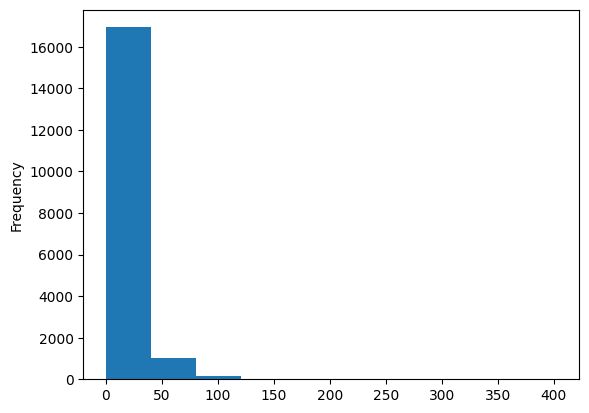

In [19]:
maindf_with_predictions.pred_diff.plot(kind='hist')



> Wir plotten nun jeweils die original Testdaten gegenüber den Testdaten, bei denen unser Modell jeweils um mehr als 50€ abweicht.



<ipython-input-20-cc989c2a3656>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell


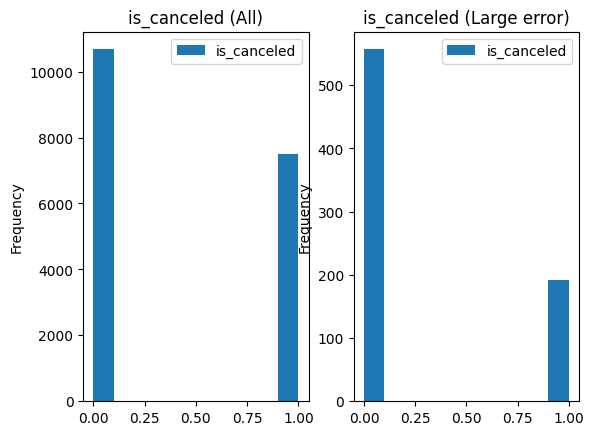

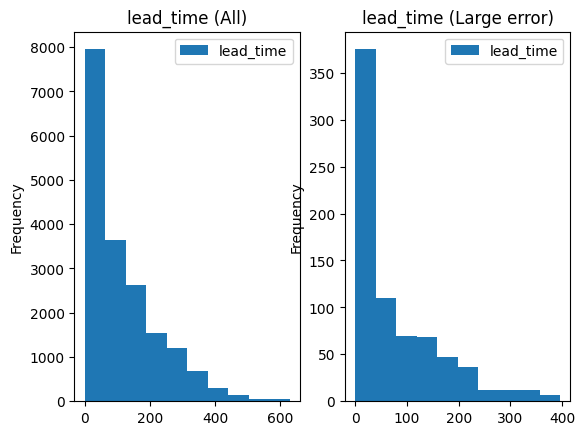

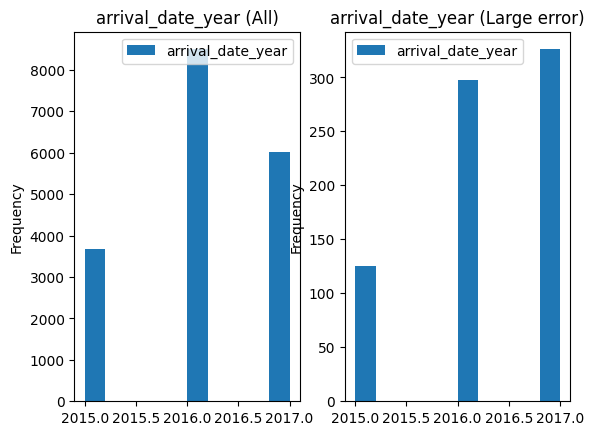

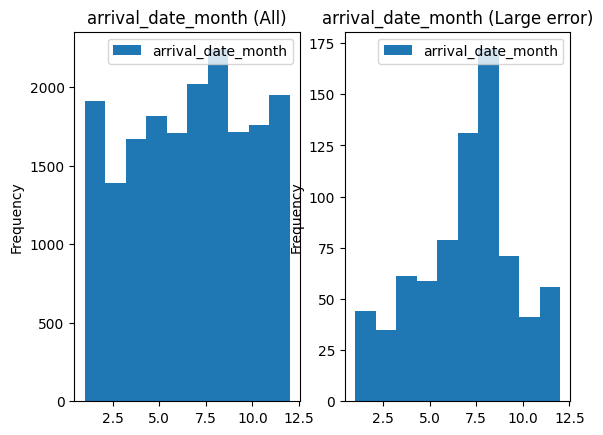

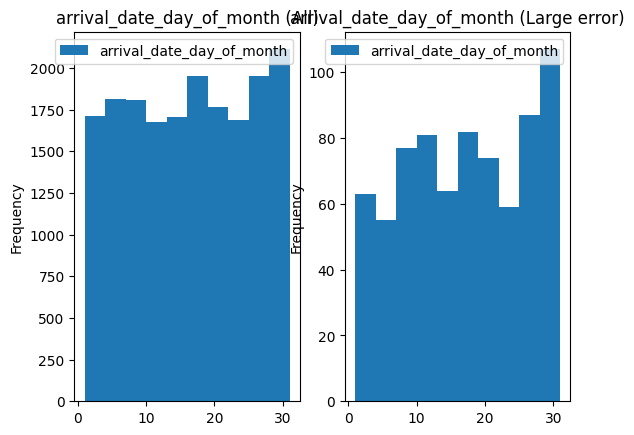

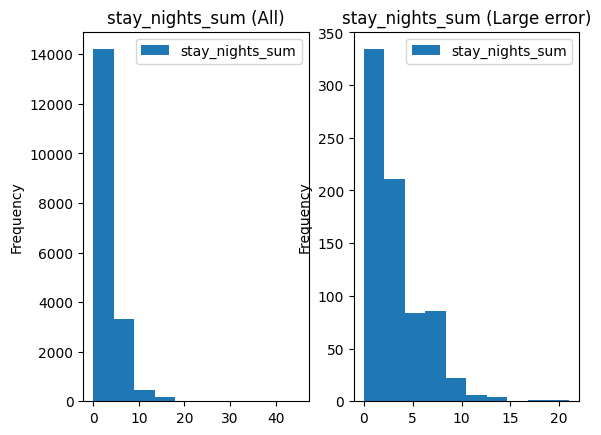

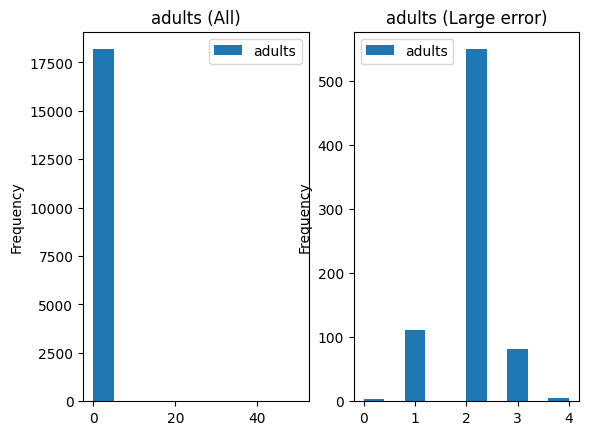

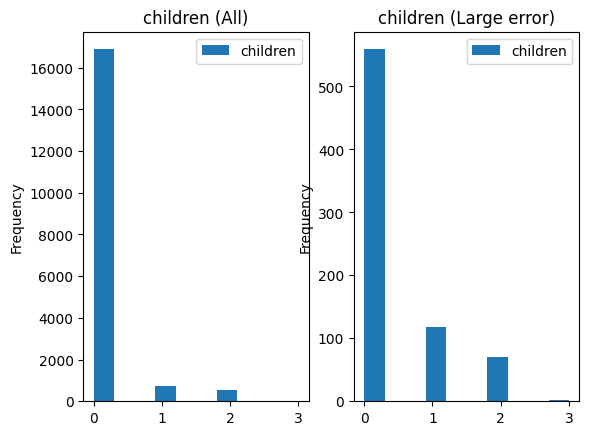

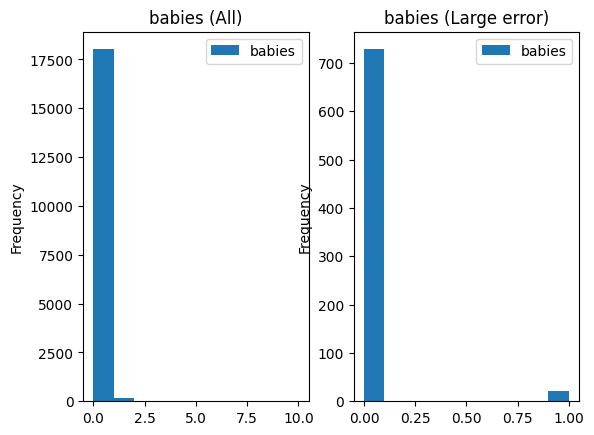

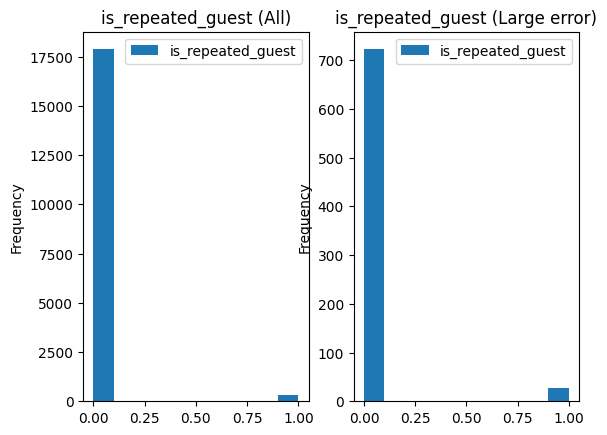

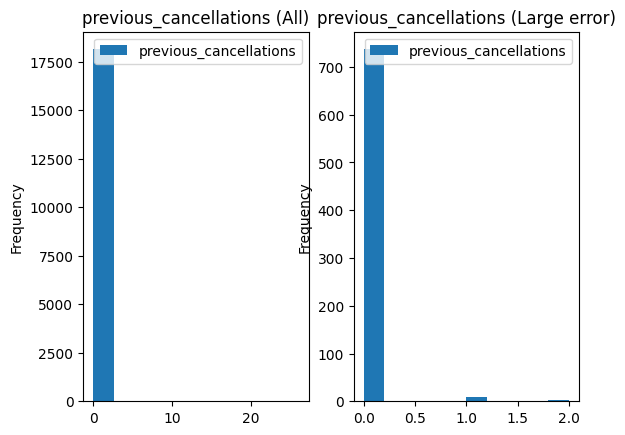

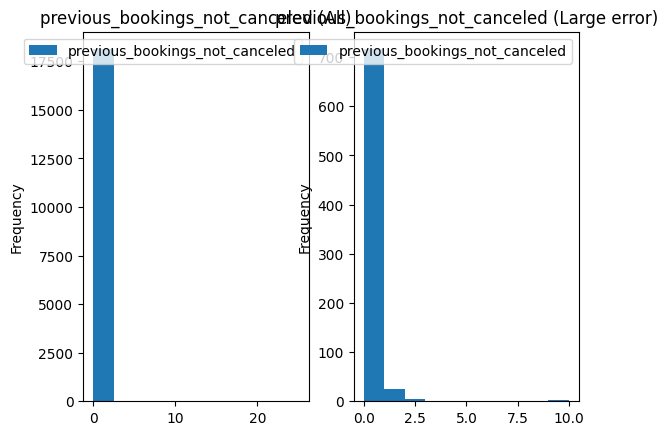

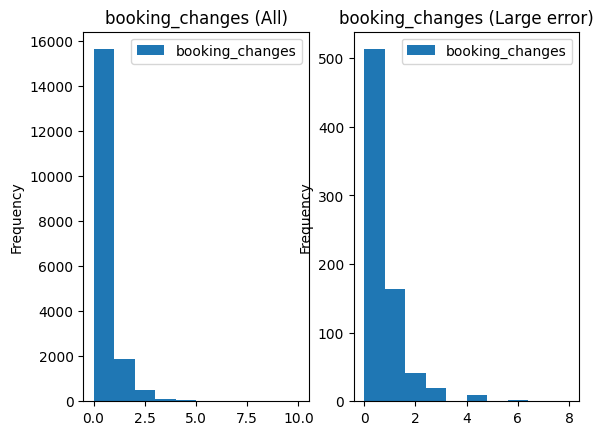

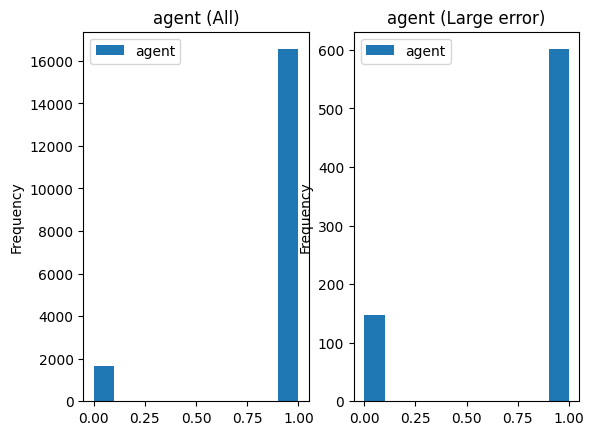

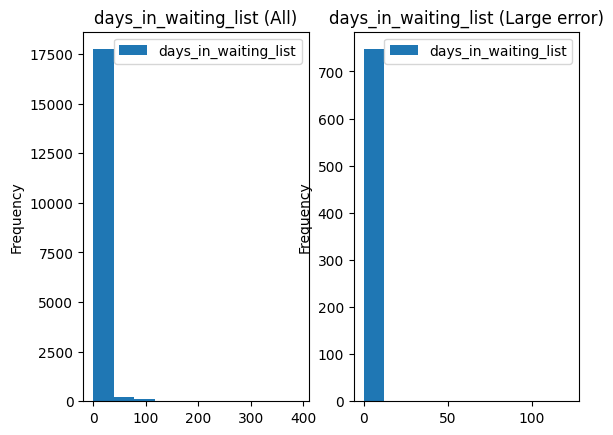

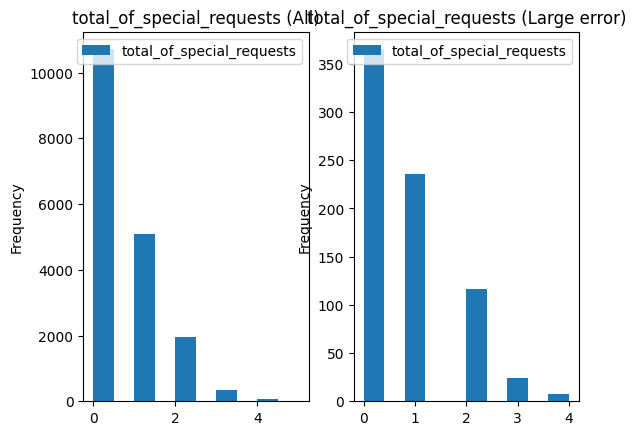

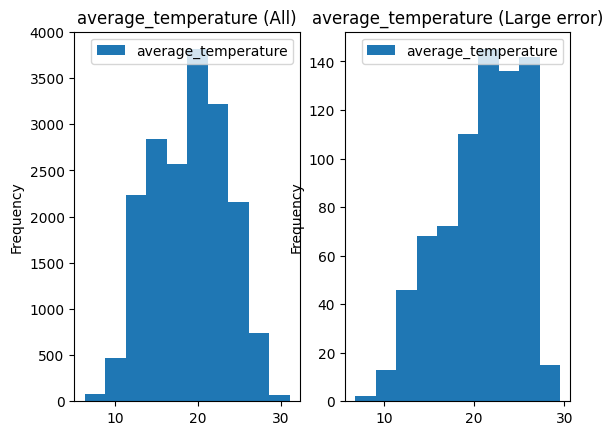

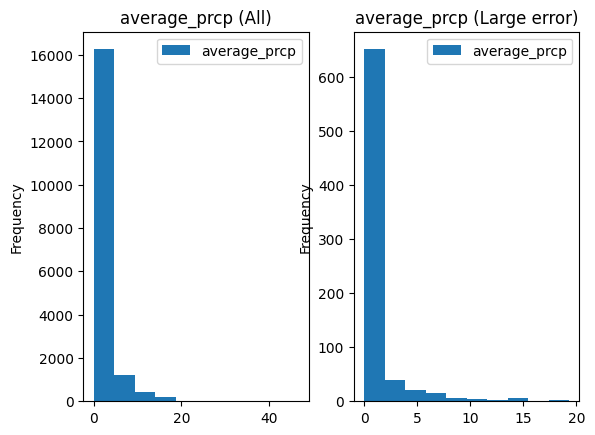

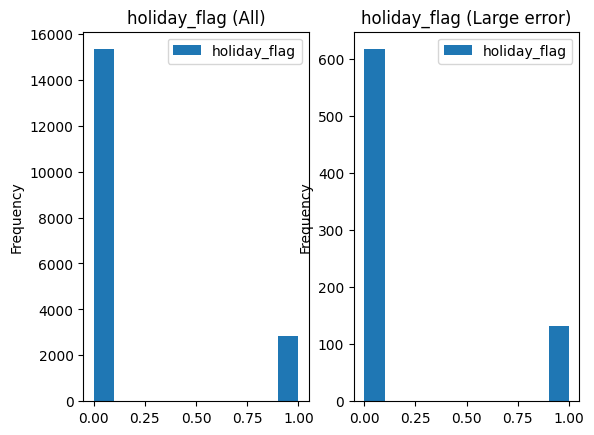

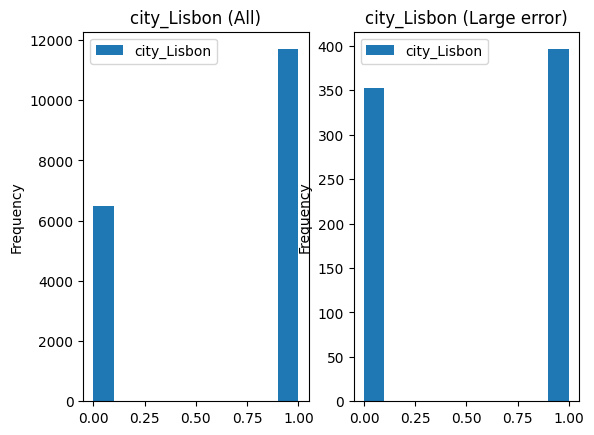

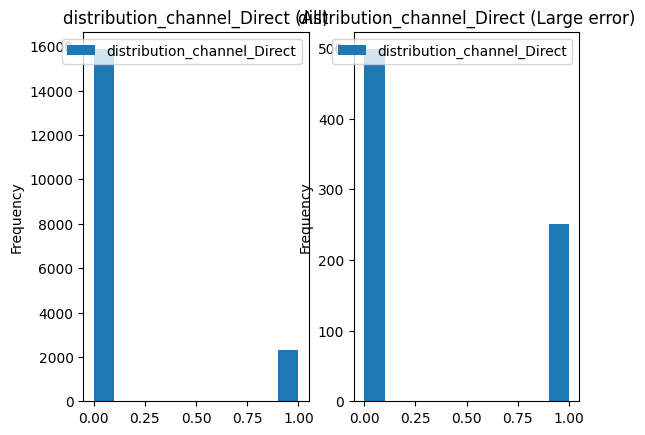

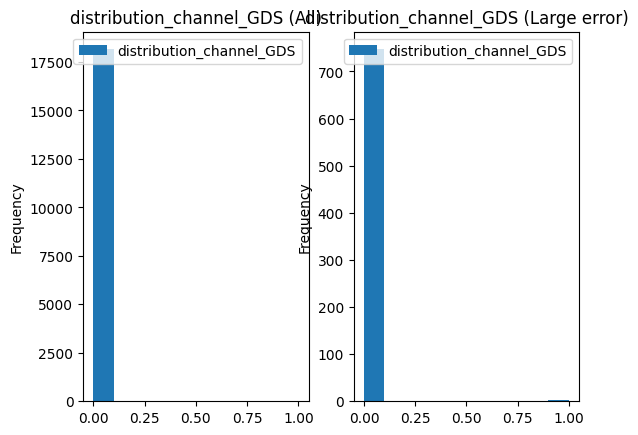

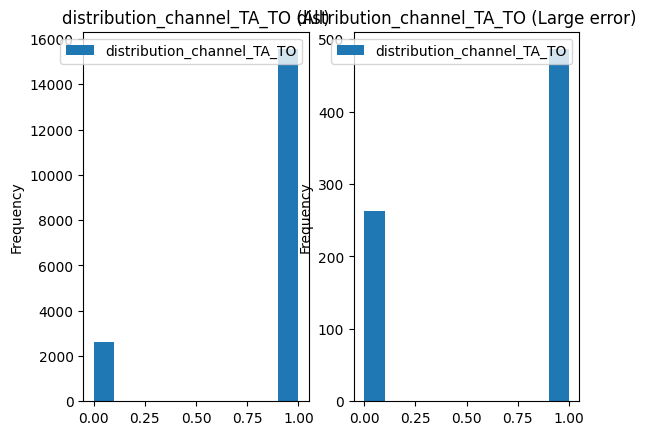

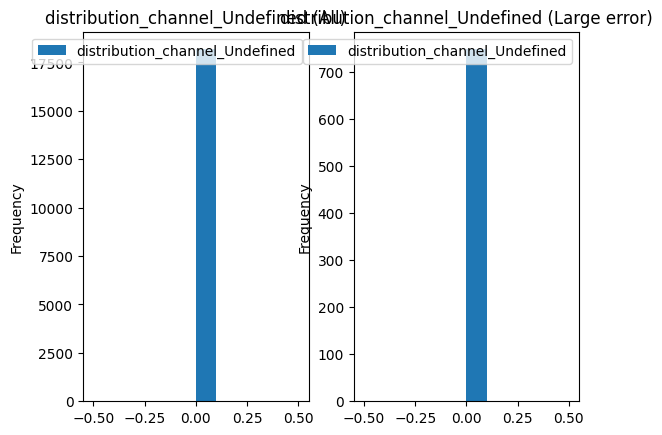

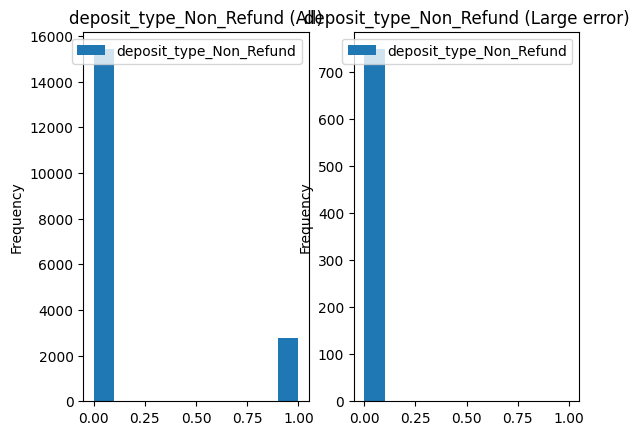

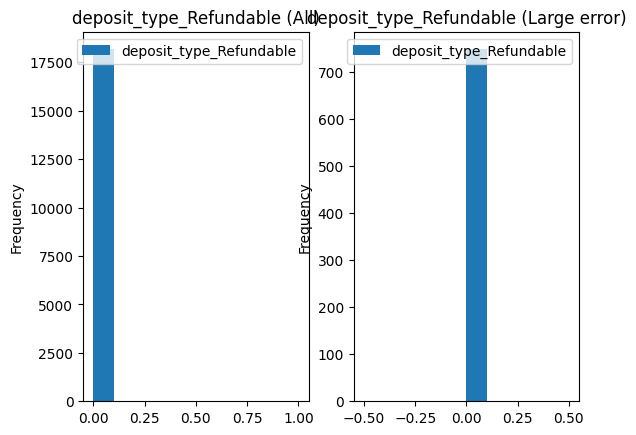

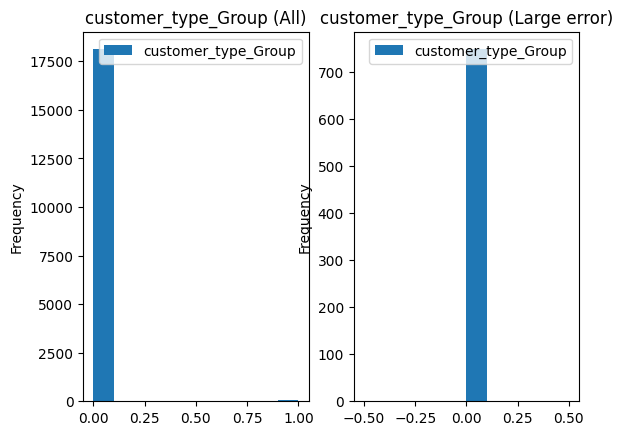

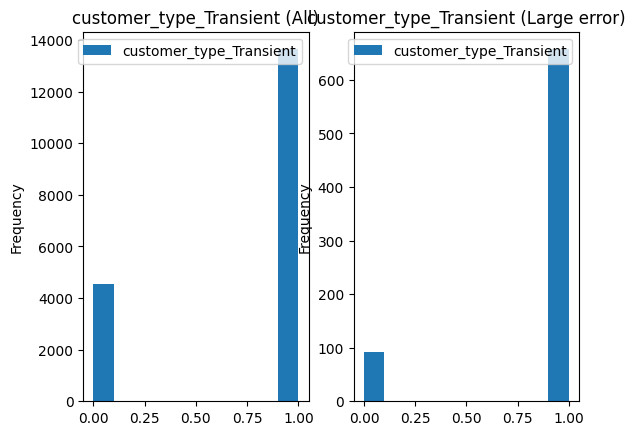

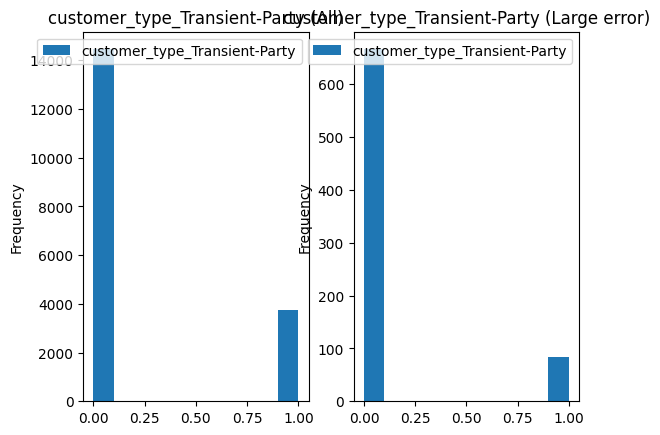

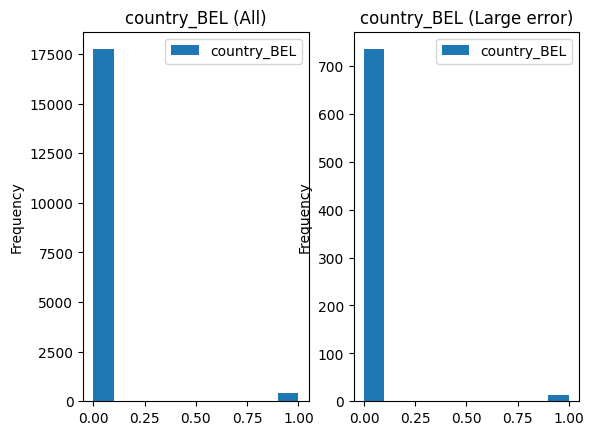

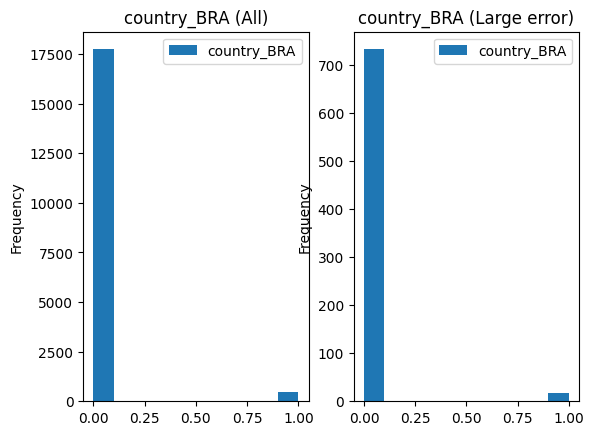

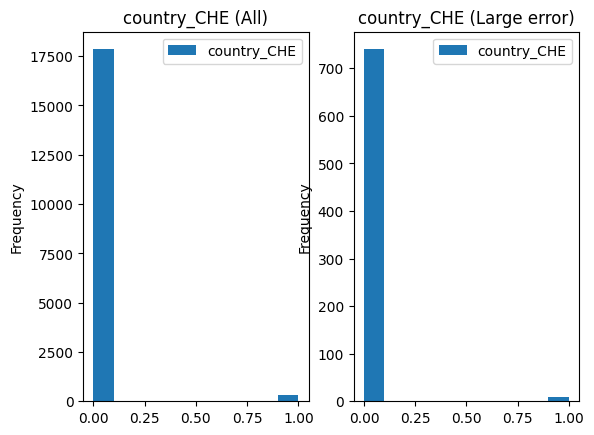

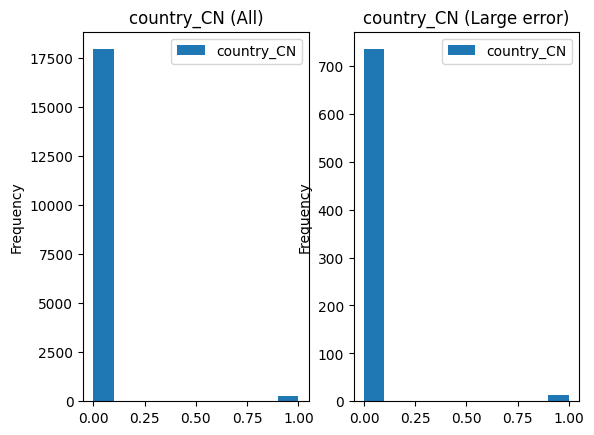

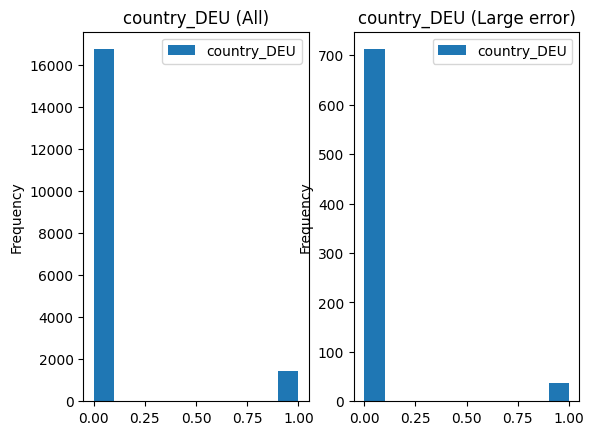

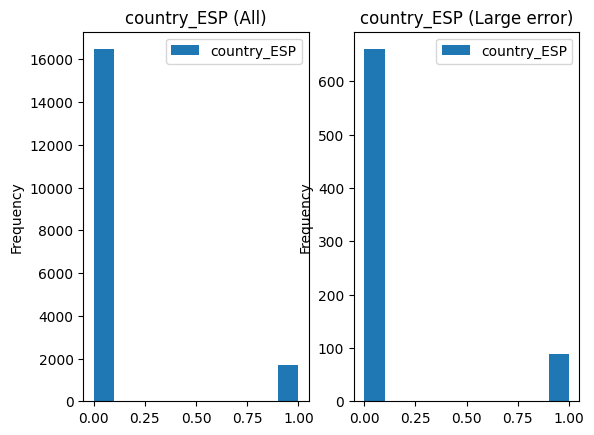

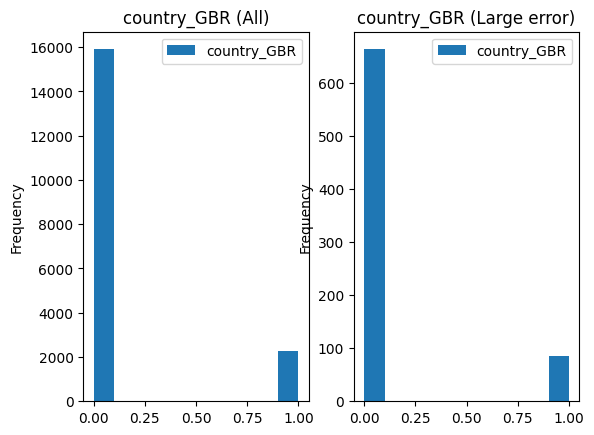

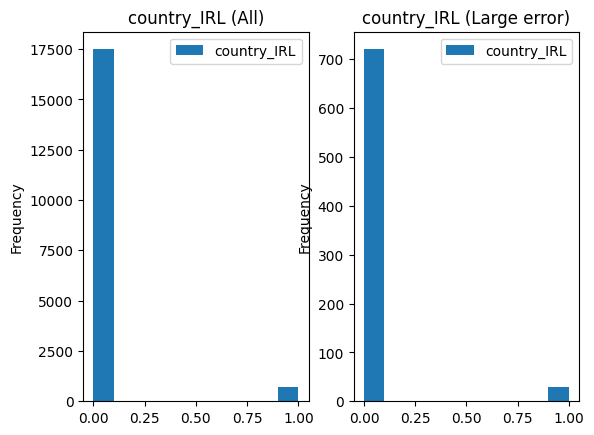

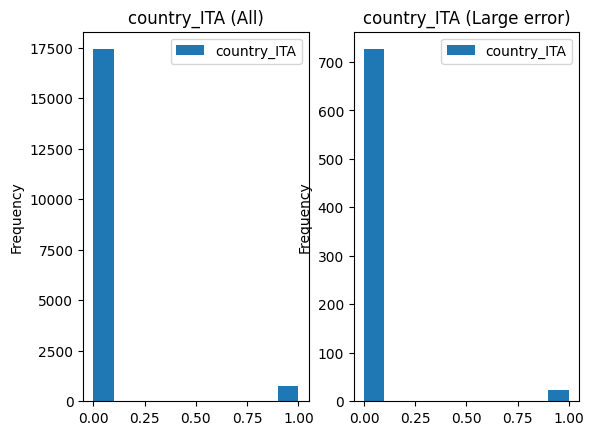

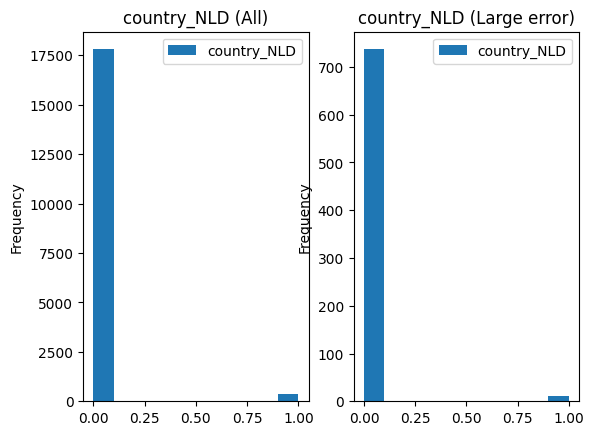

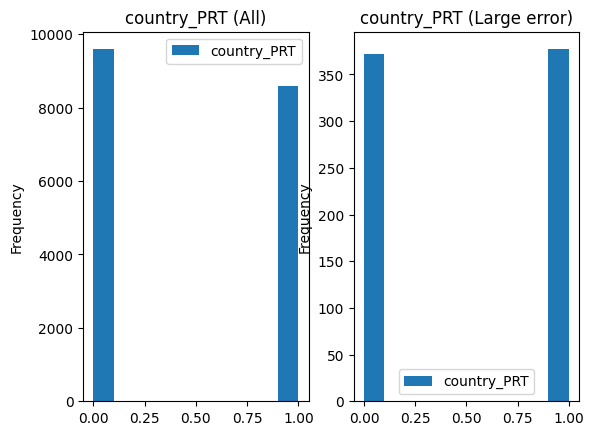

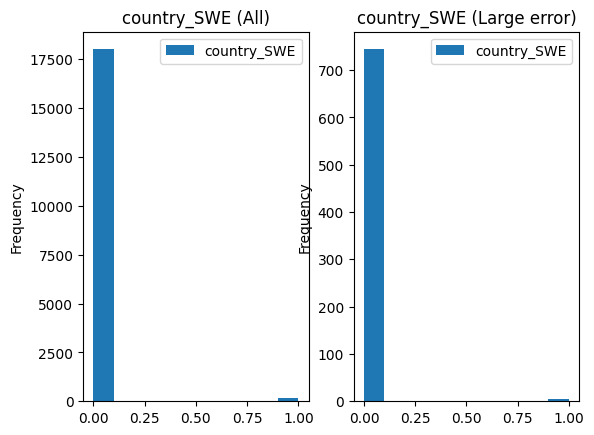

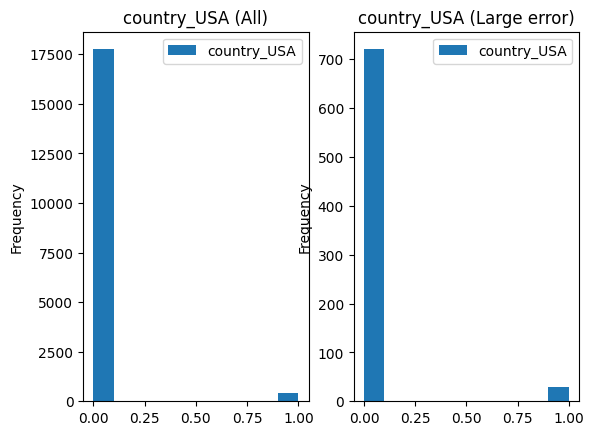

In [20]:
for column in X_test.columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  maindf_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  maindf_with_predictions[maindf_with_predictions.pred_diff > 50].plot(kind='hist', y=column, title=f'{column} (Large error)', ax=ax2)



> Es scheint, dass es unserem Modell schwerer fällt, die average daily ratio korrekt vorherzusagen bei Buchungen, die in 2017 getätigt wurden (verglichen mit Buchungen in den Vorjahren), für Buchungen in der Hochsaison (Juli, August), wenn für mehr als eine Erwachsene Person gebucht wird und wenn die Durchschnittsteperatur über 20°C liegt.



> Zunächst wird der Datensatz skaliert, wobei die Zielvariable (der Cancellation-Status) ausgenommen wird.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
maindf_scaled = maindf.copy()
columns_to_scale = list(set(maindf.columns) - {'adr'})
maindf_scaled[columns_to_scale] = scaler.fit_transform(maindf[columns_to_scale])

> Nun werden die Spalten in 'encoded'- und 'numerical'- columns eingeteilt, um sie im darauf folgenden Schritt zu visualisieren.

In [22]:
encoded_columns = ['is_canceled','arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'agent', 'is_repeated_guest', 'holiday_flag', 'city_Lisbon', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_Undefined', 'distribution_channel_TA_TO', 'deposit_type_Non_Refund', 'deposit_type_Refundable', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party',
       'country_BEL', 'country_BRA', 'country_CHE', 'country_CN', 'country_DEU', 'country_ESP', 'country_GBR', 'country_IRL', 'country_ITA', 'country_NLD', 'country_PRT', 'country_SWE', 'country_USA']
numerical_columns = list(set(maindf.columns) - set(encoded_columns))

> Mit `plt` aus der matplot-library können wir nun Säulendiagramme zu den encoded Spalten erstellen, die die Häufigkeiten der Ausprägungen anzeigen.

<ipython-input-23-f6448fbef2a2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


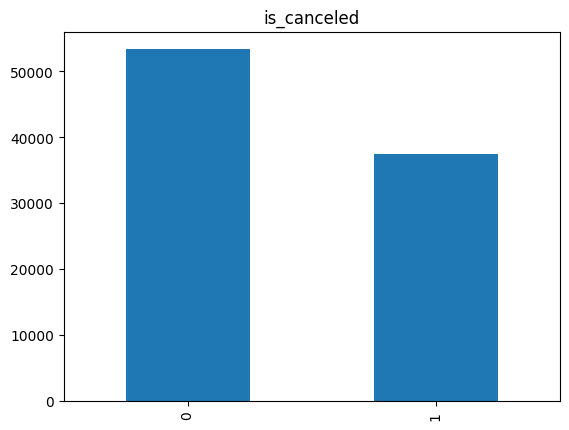

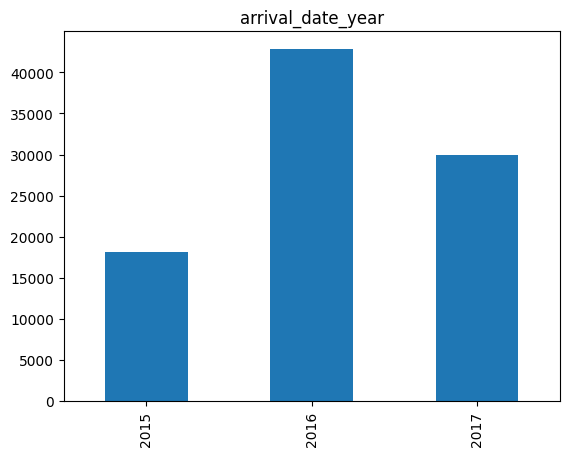

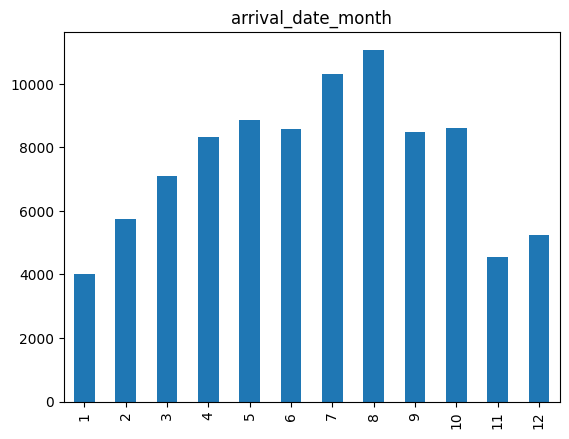

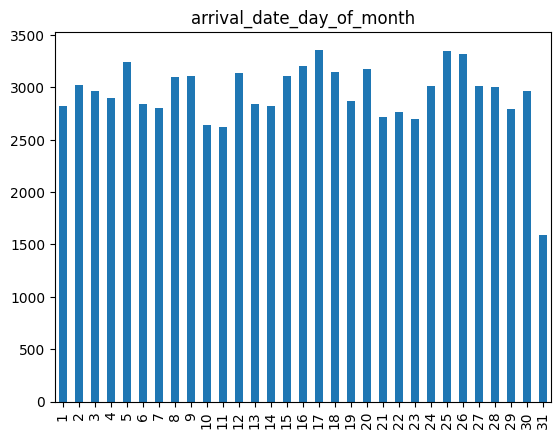

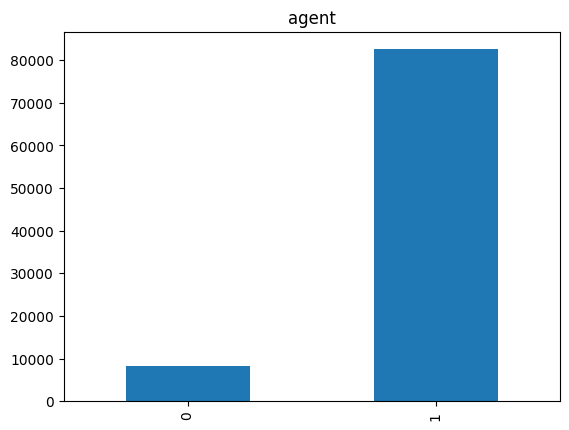

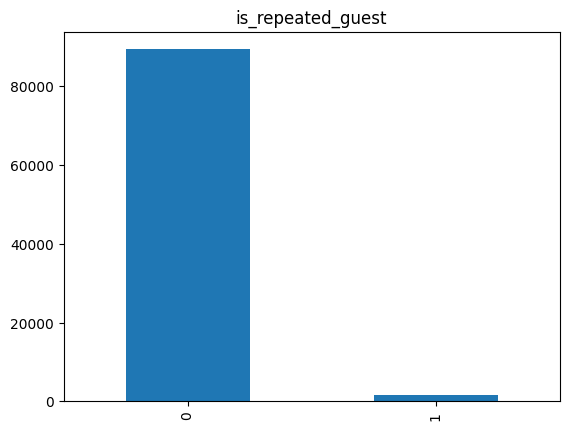

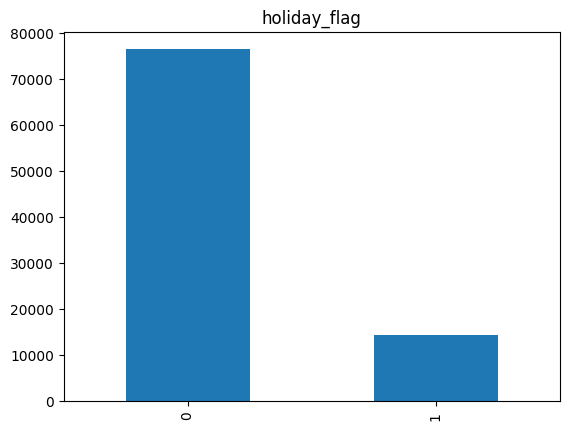

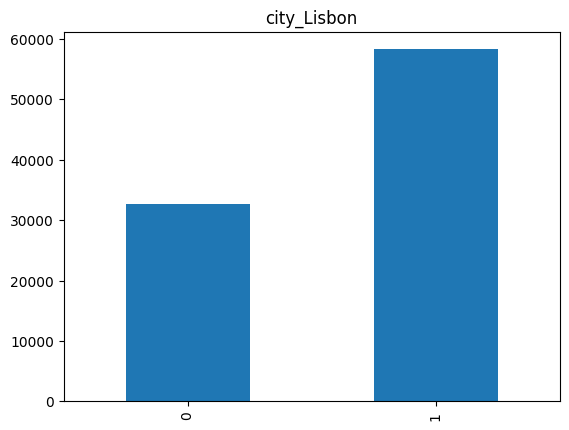

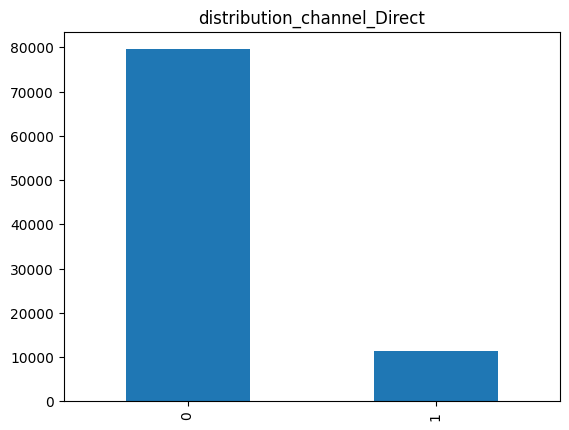

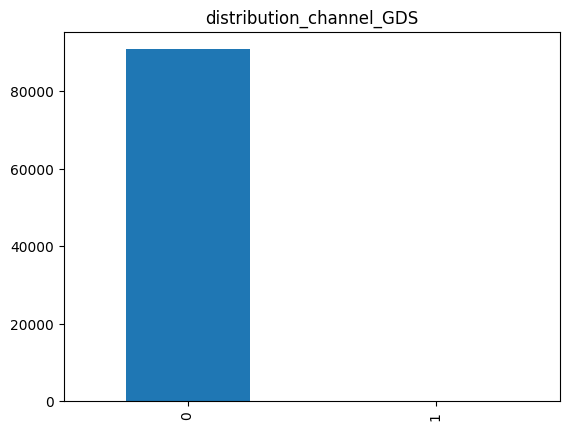

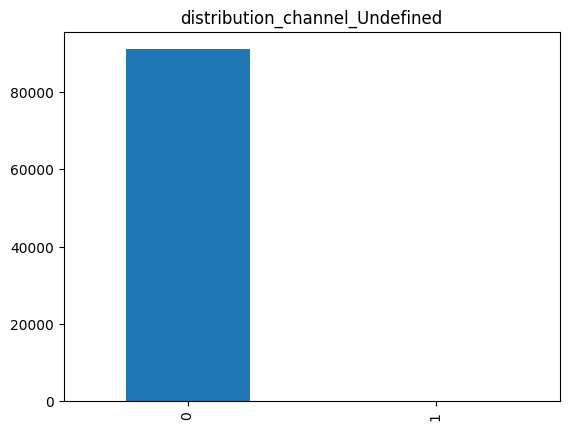

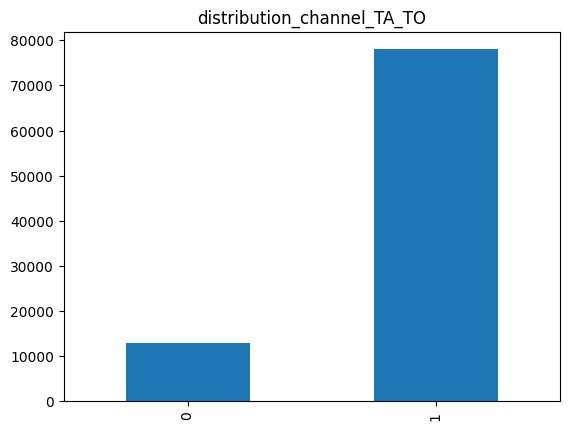

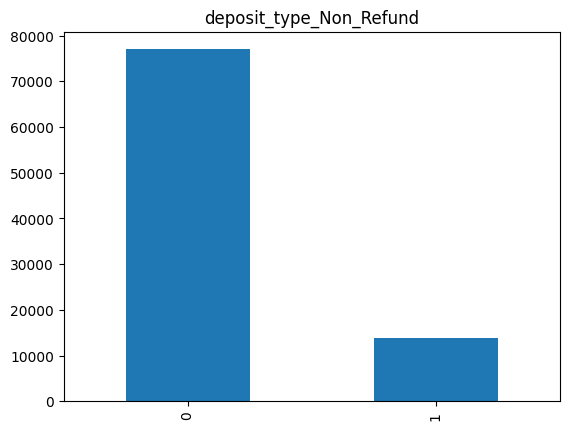

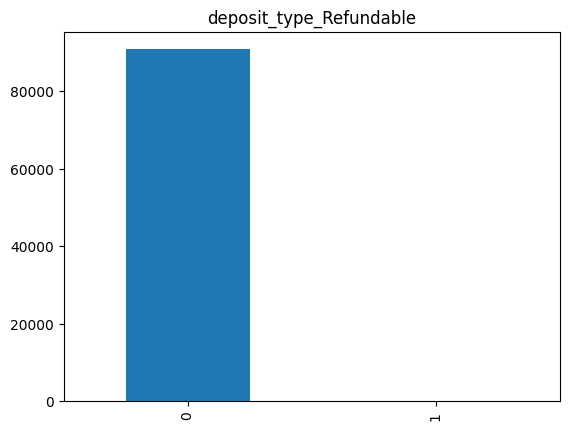

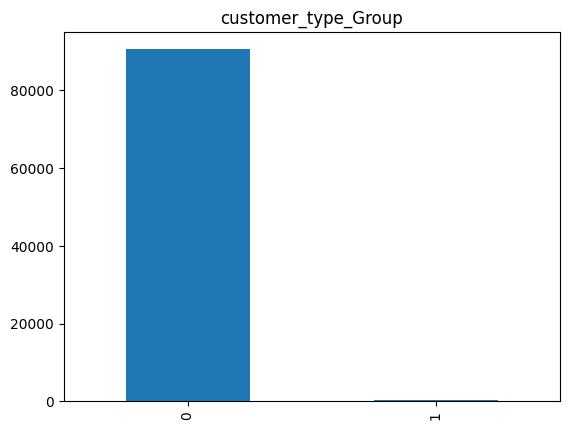

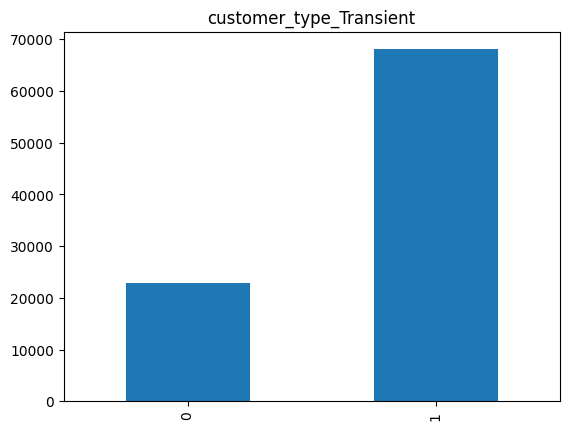

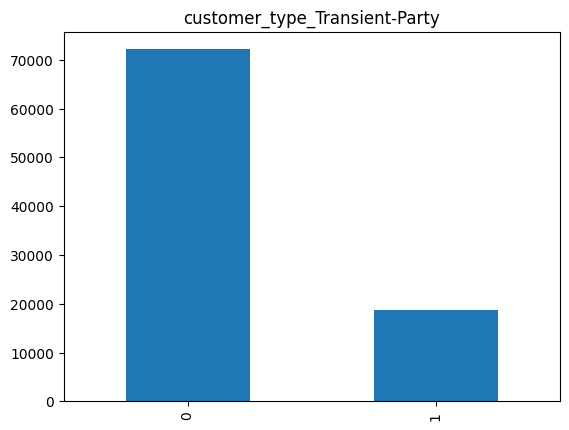

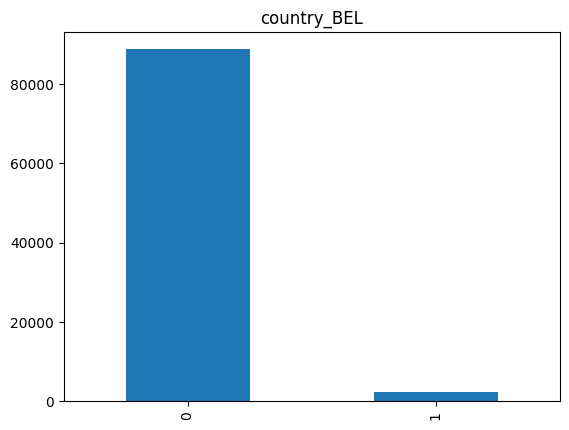

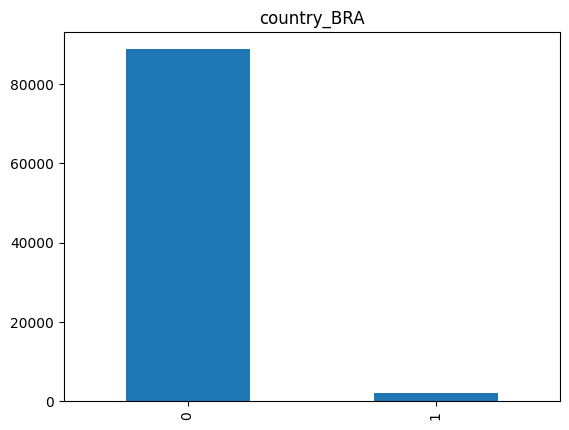

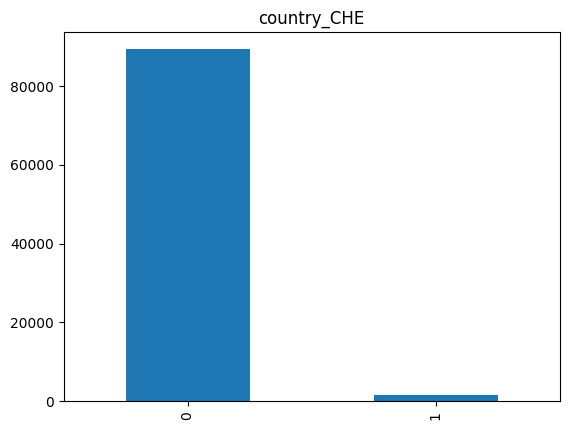

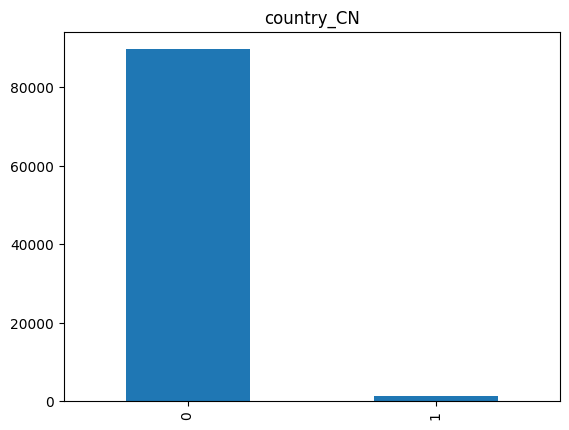

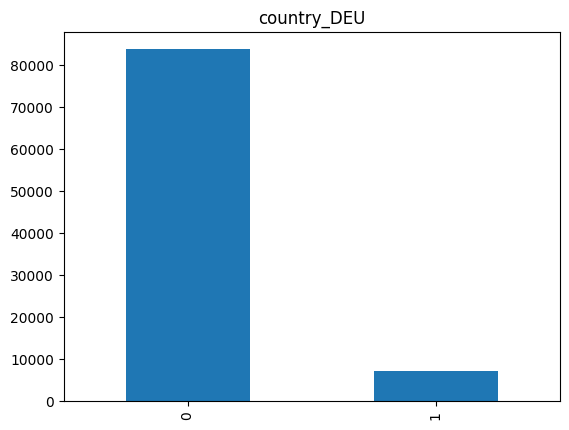

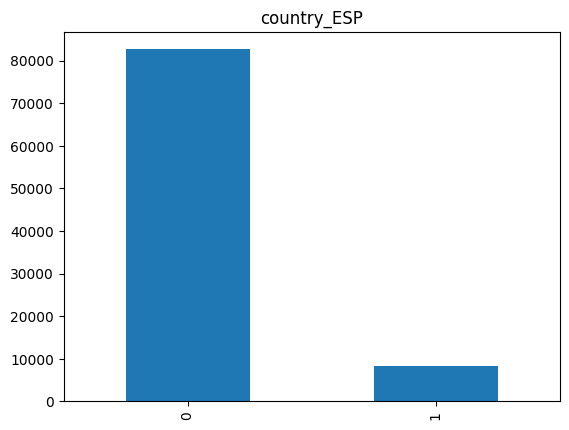

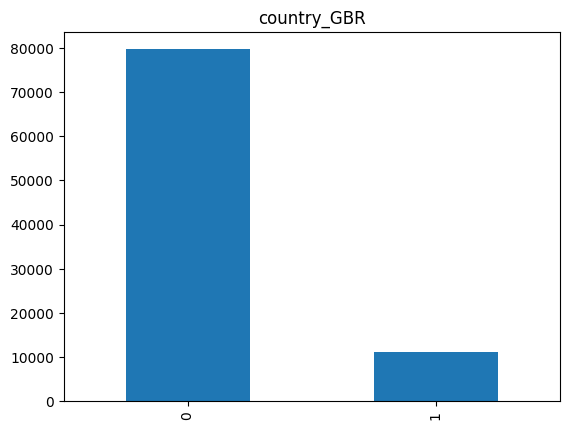

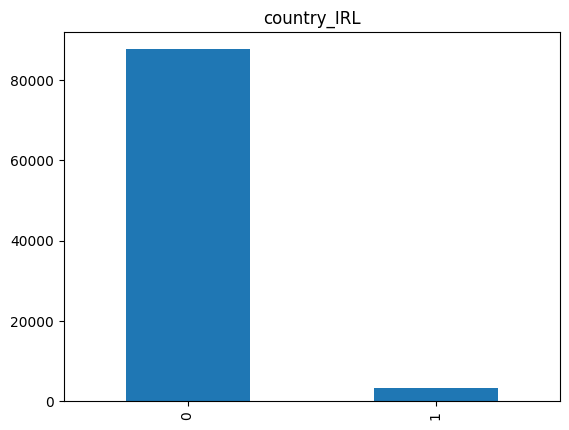

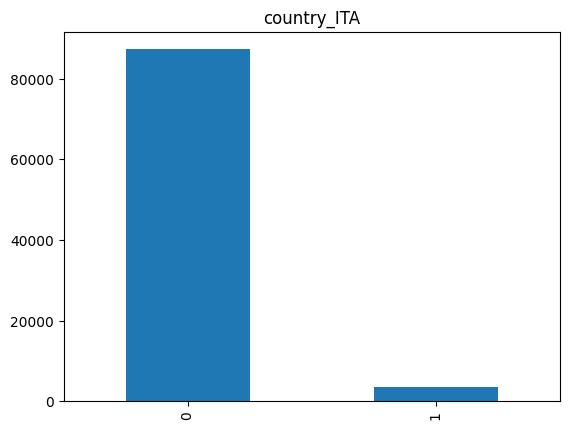

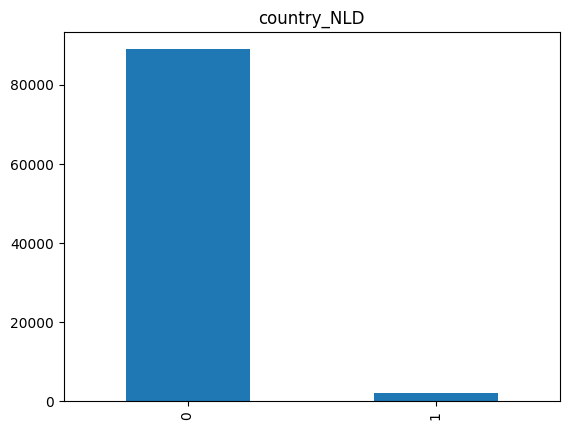

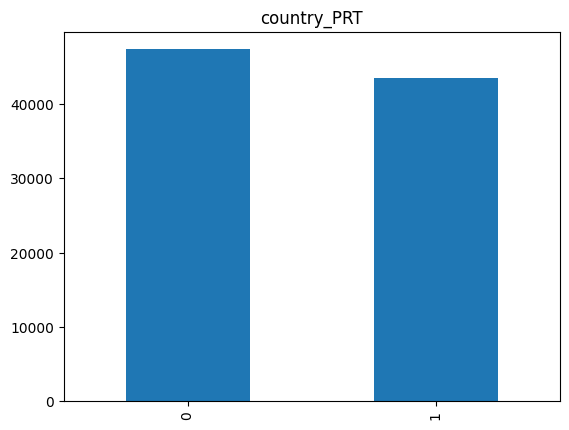

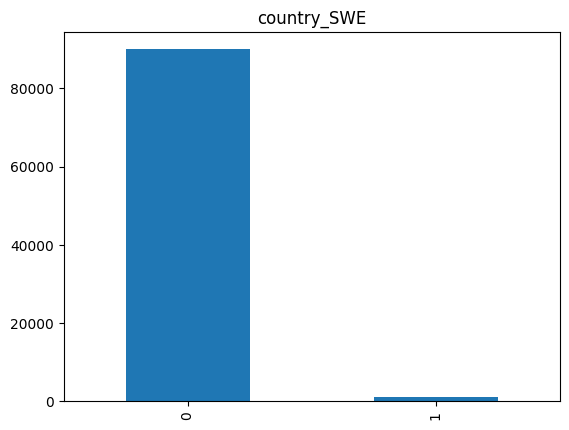

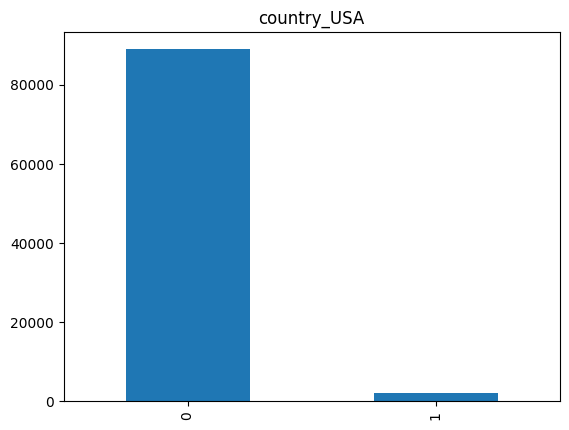

In [23]:
import matplotlib.pyplot as plt
for column in encoded_columns:
  fig = plt.figure()
  maindf[column].value_counts(sort=False).sort_index().plot(kind='bar', title=column)

> Wir geben außerdem die numerischen Spalten als Histogramme aus.

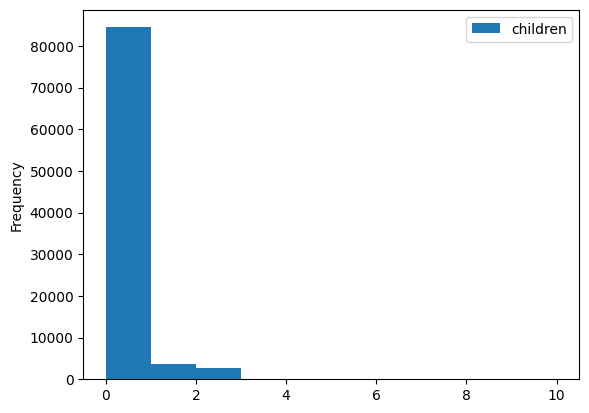

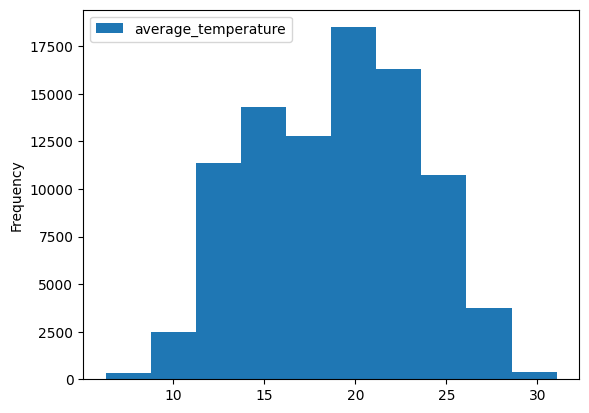

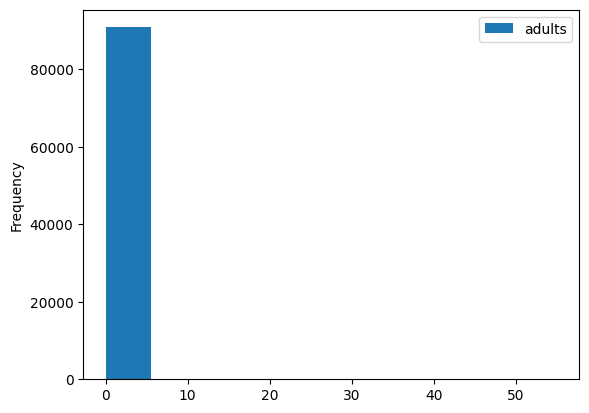

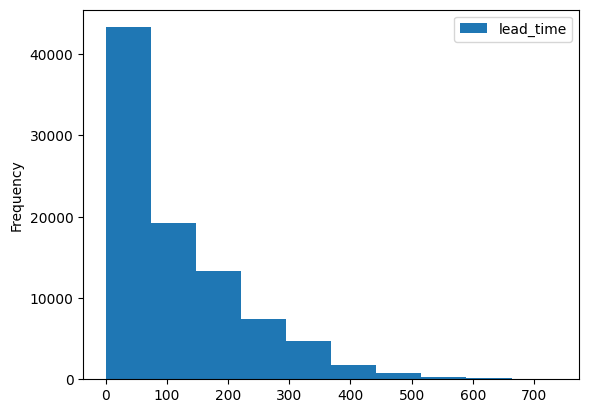

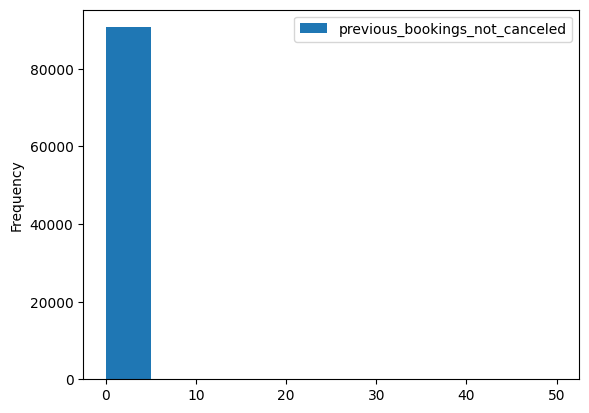

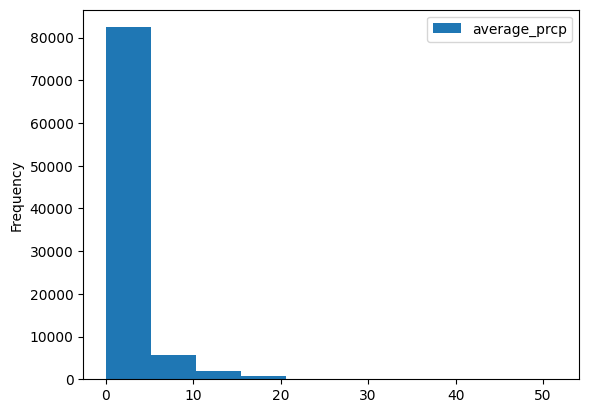

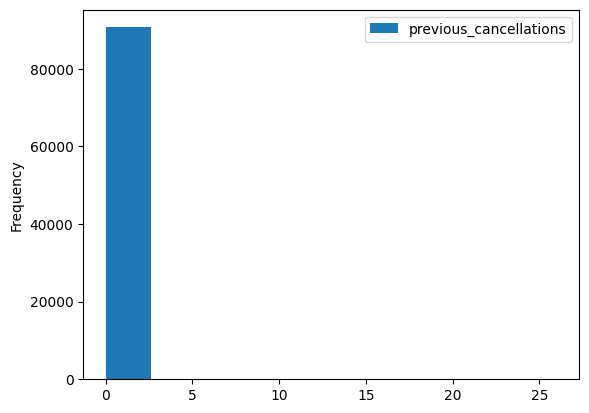

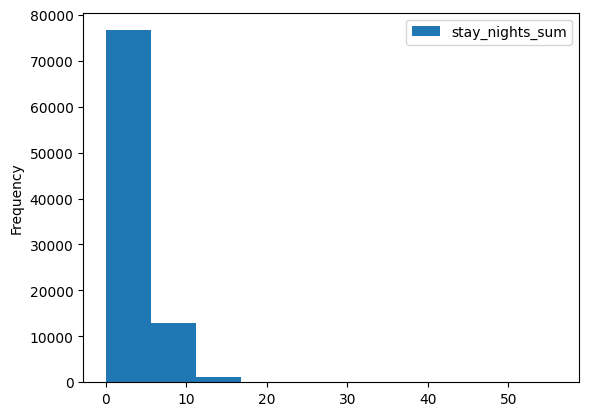

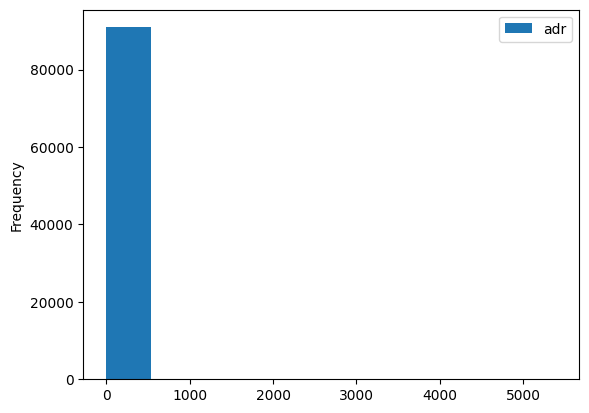

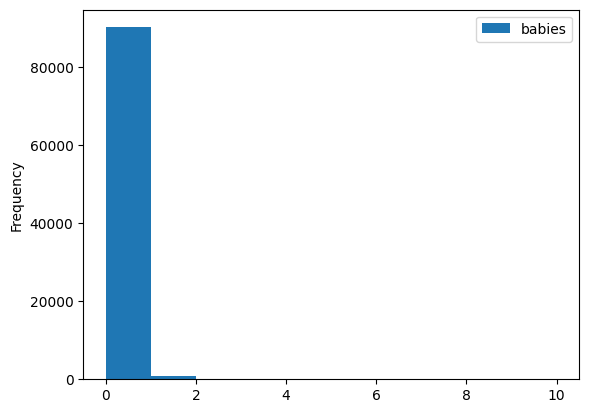

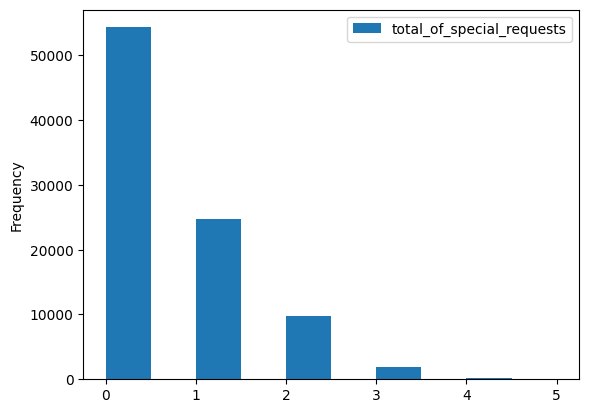

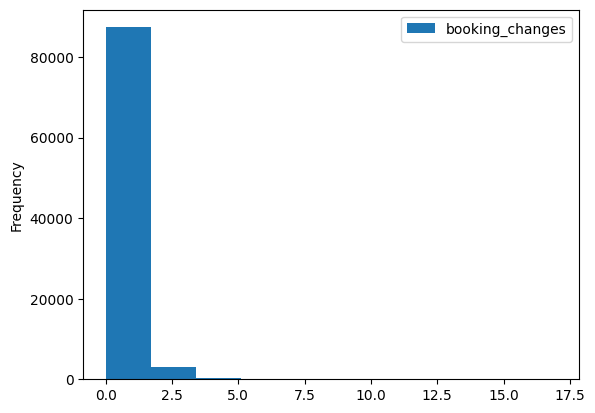

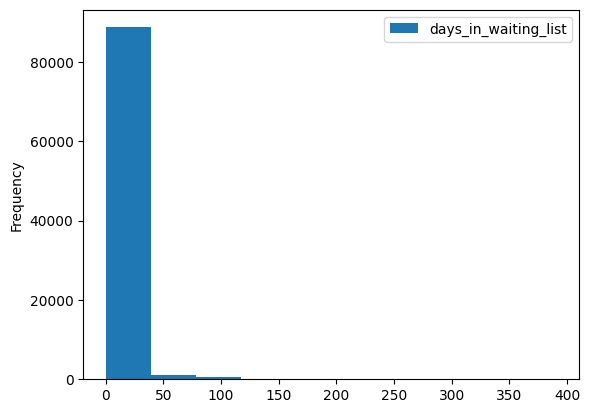

In [24]:
for column in numerical_columns:
  maindf.plot(kind='hist', y=column)

> Im nächsten Schritt checken wir durch eine Korrelationsmatrix den Zusammenhang zwischen allen noch bestehenden Features. Dabei sind hohe Korrelationen, ähnlich wie bei einer Heatmap, rot gekennzeichnet. Man kann vereinzelt stärkere und schwächere Korrelationen erkennen, aber viele Features verhalten sich neutral zueinander.

<Axes: >

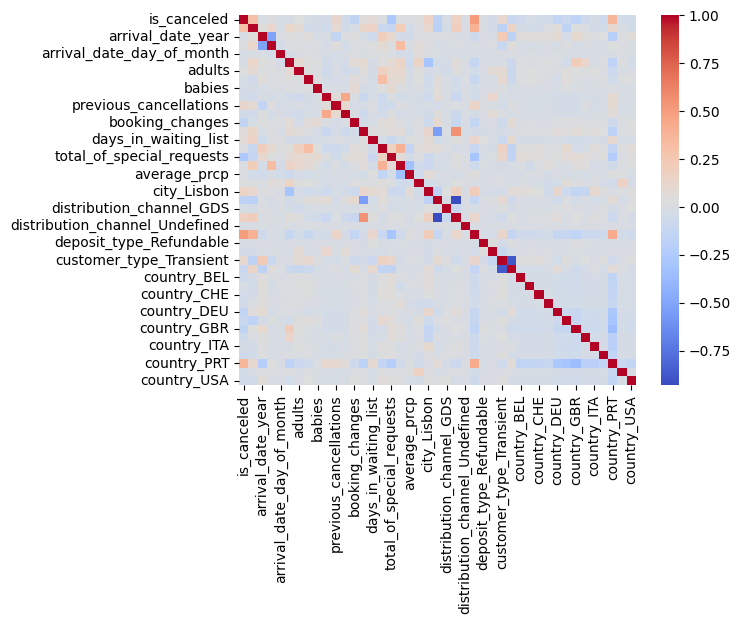

In [26]:
import seaborn as sns
# .corr() calculates the correlation between each column in our dataframe
sns.heatmap(maindf.corr(), annot=False, cmap='coolwarm')

## **cnn**

> Zuletzt wenden wir die Methode der Convolutional Neural Networks (cnn) in Regression an. Dafür laden wir die erforderlichen Funktionen, allen voran `tensorflow()`.

In [ ]:
!pip install keras
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

> Wir definieren die Funktion `build_model()`, die ein Multi-Layer Perceptron (MLP) Modell für Regression konstruiert. Sie verwendet `keras.Sequential()`, die verschiedenen Schichten werden hier also nacheinander gestapelt.

> Wir definieren die die Form der ersten Schicht (Eingabeschicht) mit `X_train.shape[1]` anhand der Anzahl der Spalten in den Trainingsdaten entspricht.

> Die folgenden zwei Schichten enthalten jeweils 64 Einheiten und werden mit der Aktivierungsfunktion Rectified Linear Unit (ReLU) ausgeführt.

> Die letzte Schicht enthält eine einzige Einheit. Da es sich um eine Regression handelt, wird für diese Schicht keine Aktivierungsfunktion festgelegt. Diese Schicht liefert also direkt den vorhergesagten Wert.

> Als Optimierer wird im ersten Anlauf der RMSprop-Algorithmus mit einer Lernrate von 0,001 gesetzt.

> Das Modell wird mit `model.compile()` zusammengestellt. Als Verlustfunktion wird der Mean Squared Error gewählt. Als Optimierer wird die bereits definierte Variable verwendet. Als Metrik verwenden wir den Mean Absolute Error.

In [ ]:
def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
  ], name='keras_sqnt')

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

> Wir trainieren das Modell auf den **nicht** skalierten Trainingsdaten und mit einer vordefinierten Anzahl von Epochen von 50, lassen das Modell also 50 Mal über die gesamten Daten iterieren.

> Mit `verbose=1` geben wir an, dass wir für jede der 50 Epochen einen Fotschrittsbalken sowie ein kurzes Protokoll einsehen möchten, in dem u.A. der jeweilige Verlust sowie der MAE enthalten ist.

In [ ]:
EPOCHS = 50
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

> Wir definieren 2 Funktionen zur Visualisierung unseres Modells in einem Plot: für den Verlust und den MAE.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Verlust')
  plt.ylabel('Verlust')
  plt.xlabel('Epoche')
  plt.xlim([0,EPOCHS])
  plt.ylim([min(history.history['val_loss'])-1,max(history.history['val_loss'])+1])
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def plot_mae(history):
  plt.plot(history.history['mae'])
  plt.plot(history.history['val_mae'])
  plt.title('Mean Absolute Error')
  plt.ylabel('Mean Absolute Error [in €]')
  plt.xlabel('Epoche')
  plt.xlim([0,EPOCHS])
  plt.ylim([min(history.history['val_mae'])-1,max(history.history['val_mae'])+1])
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

> Wir lassen uns den Plot für den MAE unseres Modells ausgeben. Für jede der 50 Epochen wird uns also der MAE einmal im Training und bei der Validierung geplottet.

In [ ]:
plot_mae(history)

> Hier erkennen wir sehr gut, wie der MAE sich stetig verbessert, je mehr Epochen wir durchlaufen lassen.

> Während die Linie auf Basis der Trainingsdaten ruhig verläuft, weist die Linie der Validierungs- bzw. Testdaten große Ausschläge auf.

> Den MAE können wir hier vorerst nur abschätzen - er liegt gegen Ende bei ~23€. Wollen wir den niedrigsten - also den optimalen - MAE herausfinden, wenden wir die `evaluate()`-Funktion auf unser Modell an. Mit den geschätzten ~23€ lagen wir nur knapp unter dem tatsächlichen MAE von 23.1, unser Modell performt schon recht gut.

In [ ]:
evaluate(model, X_test, y_test)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim([0, 400])
  plt.ylim([0, 400])
  _ = plt.plot([0, 400],[0,400])

In [ ]:
plot_prediction(y_test, predictions)

### **Optimizer: Adam**

> In einem letzten Versuch verwenden wir den Optizer `Adam()` und hoffen auf eine Optimierung des Modell-Performance.

> Wir definieren das Modell noch einmal neu und trainieren es über 50 Epochen hinweg auf unseren Trainingsdaten.


In [ ]:
from keras.optimizers import Adam

def build_model():
  model_adam = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
  ], name='keras_sqnt_adam')

  optimizer = Adam()

  model_adam.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['mae'])
  return model_adam

model_adam = build_model()
model_adam.summary()

In [ ]:
EPOCHS = 50
history_adam = model_adam.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
plot_mae(history_adam)

> Hier erkennen wir höhere Ausschläge bei der Performance der Validierungsdaten.

> Schauen wir uns die Performance-Metriken genauer an, erkennen wir, dass $R^2$ mit 0.53 etwas niedriger und der MAE mit 24.21 etwas höher sind als zuvor.

In [ ]:
evaluate(model_adam, X_test, y_test)